<div style="text-align: center;">
  <img src="https://i.ibb.co/TMVrS7L6/FULL-COLOR.png" alt="BLUE" border="0" style="width:500px;">
</div>

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#!pip install openpyxl
courses = pd.read_excel("../assets/data/courses.xlsx")

In [3]:
courses.head()

,Course Id,Course-Title,Is Paid,Level,Published Date,Pulished Timestamp,Subject,URL1,CONTENT DURATION in HR's,Num Lectures,Price,Reviews,Students
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,18/01/17,30/12/1899 12:58:58 pm,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,200,23,2147
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,2017-09-03 00:00:00,30/12/1899 8:34:20 am,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,75,923,2792
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,19/12/16,30/12/1899 11:26:30 am,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,45,74,2174
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Paid,All Levels,30/05/17,30/12/1899 1:07:24 am,Business Finance,https://www.udemy.com/complete-excel-finance-c...,3.000000,36,95,11,2451
4,1011058,How To Maximize Your Profits Trading Options,Paid,Intermediate Level,13/12/16,30/12/1899 6:57:18 am,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,2.000000,26,200,45,1276


In [4]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Course Id                 3673 non-null   int64  
 1   Course-Title              3673 non-null   object 
 2   Is Paid                   3673 non-null   object 
 3   Level                     3673 non-null   object 
 4   Published Date            3673 non-null   object 
 5   Pulished Timestamp        3673 non-null   object 
 6   Subject                   3673 non-null   object 
 7   URL1                      3673 non-null   object 
 8   CONTENT DURATION in HR's  3673 non-null   float64
 9   Num Lectures              3673 non-null   int64  
 10  Price                     3673 non-null   int64  
 11  Reviews                   3673 non-null   int64  
 12  Students                  3673 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 373.2+ KB


In [5]:
courses.rename(columns={
    'Course Id': 'course_id',
    'Course-Title': 'course_title',
    'Is Paid': 'is_paid',
    'Level': 'level',
    'Published Date': 'published_date',
    'Pulished Timestamp': 'published_timestamp',
    'Subject': 'subject',
    'URL1': 'url',
    "CONTENT DURATION in HR's": 'content_duration_hr',
    'Num Lectures': 'num_lectures',
    'Price': 'price',
    'Reviews': 'reviews',
    'Students': 'students'
}, inplace=True)

In [6]:
print(courses.isnull().sum())

course_id              0
course_title           0
is_paid                0
level                  0
published_date         0
published_timestamp    0
subject                0
url                    0
content_duration_hr    0
num_lectures           0
price                  0
reviews                0
students               0
dtype: int64


In [7]:
print(courses.isna().sum())

course_id              0
course_title           0
is_paid                0
level                  0
published_date         0
published_timestamp    0
subject                0
url                    0
content_duration_hr    0
num_lectures           0
price                  0
reviews                0
students               0
dtype: int64


In [8]:
print(f"Duplicates: {courses.duplicated().sum()}")

Duplicates: 6


In [9]:
courses.drop_duplicates(inplace=True)

In [10]:
courses.describe()

,course_id,content_duration_hr,num_lectures,price,reviews,students
count,3.667000e+03,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,6.763579e+05,4.119873,40.136079,66.103082,156.551404,3192.060813
std,3.428148e+05,6.050489,50.445168,61.058165,936.803791,9494.103073
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.081750e+05,1.130000,15.000000,20.000000,4.000000,111.000000
50%,6.880920e+05,2.000000,25.000000,45.000000,18.000000,912.000000
75%,9.608420e+05,4.500000,46.000000,95.000000,67.000000,2545.000000
max,1.282064e+06,78.500000,779.000000,200.000000,27445.000000,268923.000000


In [11]:
courses

,course_id,course_title,is_paid,level,published_date,published_timestamp,subject,url,content_duration_hr,num_lectures,price,reviews,students
0,1070968,Ultimate Investment Banking Course,Paid,All Levels,18/01/17,30/12/1899 12:58:58 pm,Business Finance,https://www.udemy.com/ultimate-investment-bank...,0.045139,51,200,23,2147
1,1113822,Complete GST Course & Certification - Grow You...,Paid,All Levels,2017-09-03 00:00:00,30/12/1899 8:34:20 am,Business Finance,https://www.udemy.com/goods-and-services-tax/,39.000000,274,75,923,2792
2,1006314,Financial Modeling for Business Analysts and C...,Paid,Intermediate Level,19/12/16,30/12/1899 11:26:30 am,Business Finance,https://www.udemy.com/financial-modeling-for-b...,2.500000,51,45,74,2174
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,Paid,All Levels,30/05/17,30/12/1899 1:07:24 am,Business Finance,https://www.udemy.com/complete-excel-finance-c...,3.000000,36,95,11,2451
4,1011058,How To Maximize Your Profits Trading Options,Paid,Intermediate Level,13/12/16,30/12/1899 6:57:18 am,Business Finance,https://www.udemy.com/how-to-maximize-your-pro...,2.000000,26,200,45,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,1194232,Learning Path: Akka: Building Applications and...,Paid,Intermediate Level,2017-03-05 00:00:00,30/12/1899 5:35:35 am,Web Development,https://www.udemy.com/learning-path-akka-build...,4.500000,55,200,8,88
3669,991290,Dynamic JavaScript Master Class AJAX JSON Simp...,Paid,Intermediate Level,24/10/16,30/12/1899 8:36:40 am,Web Development,https://www.udemy.com/ajax-course/,4.500000,65,200,117,9773
3670,908996,Parse Server: From Front End to Full Stack,Paid,Intermediate Level,28/07/16,30/12/1899 5:54:17 am,Web Development,https://www.udemy.com/parse-server/,6.000000,66,200,162,1130
3671,929130,Angular 4: From Theory to Practice & FREE E-Book,Paid,Intermediate Level,15/11/16,30/12/1899 1:35:06 am,Web Development,https://www.udemy.com/angular-2-from-theory-to...,15.500000,129,200,622,4375


In [12]:
print(courses['is_paid'].value_counts())

is_paid
Paid    3358
Free     309
Name: count, dtype: int64


In [13]:
print(courses['level'].value_counts())
print(courses['subject'].value_counts())

level
All Levels            1920
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64
subject
Web Development        1199
Business Finance       1190
Musical Instruments     676
Graphic Design          602
Name: count, dtype: int64


In [14]:
# Convert 'published_date' to datetime (with dayfirst=True since your format is dd/mm/yy)
courses['published_date'] = pd.to_datetime(courses['published_date'], dayfirst=True, errors='coerce')

# Clean 'published_timestamp' string and extract time part only:
courses['time_only'] = courses['published_timestamp'].str.extract(r'(\d{1,2}:\d{2}:\d{2}\s*[ap]m)', flags=re.IGNORECASE)[0]

# Convert time_only to datetime.time
courses['time_only'] = pd.to_datetime(courses['time_only'], format='%I:%M:%S %p', errors='coerce').dt.time

# Combine date and time columns into a single datetime column:
courses['published_datetime'] = courses.apply(
    lambda row: pd.Timestamp.combine(row['published_date'], row['time_only']) if pd.notnull(row['published_date']) and pd.notnull(row['time_only']) else pd.NaT,
    axis=1
)

print(courses[['published_date', 'time_only', 'published_datetime']].head())

C:\Users\machine\AppData\Local\Temp\ipykernel_5872\2548508677.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  courses['published_date'] = pd.to_datetime(courses['published_date'], dayfirst=True, errors='coerce')


  published_date time_only  published_datetime
0     2017-01-18  12:58:58 2017-01-18 12:58:58
1     2017-09-03  08:34:20 2017-09-03 08:34:20
2     2016-12-19  11:26:30 2016-12-19 11:26:30
3     2017-05-30  01:07:24 2017-05-30 01:07:24
4     2016-12-13  06:57:18 2016-12-13 06:57:18


In [15]:
courses = courses.drop(columns=['published_date', 'published_timestamp', 'time_only'])

In [16]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3667 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_id            3667 non-null   int64         
 1   course_title         3667 non-null   object        
 2   is_paid              3667 non-null   object        
 3   level                3667 non-null   object        
 4   subject              3667 non-null   object        
 5   url                  3667 non-null   object        
 6   content_duration_hr  3667 non-null   float64       
 7   num_lectures         3667 non-null   int64         
 8   price                3667 non-null   int64         
 9   reviews              3667 non-null   int64         
 10  students             3667 non-null   int64         
 11  published_datetime   3667 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 372.4+ KB


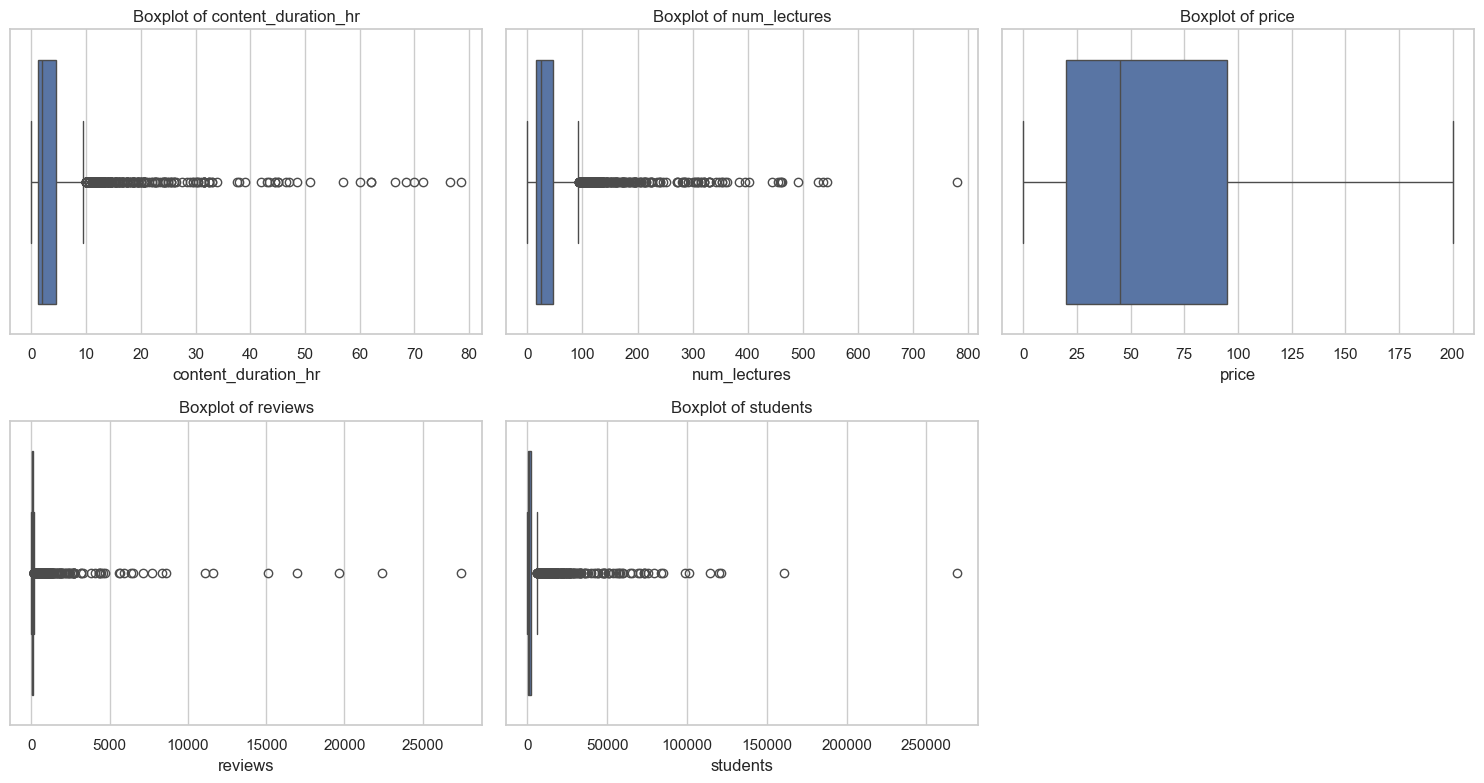

In [17]:
num_cols = ['content_duration_hr', 'num_lectures', 'price', 'reviews', 'students']
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=courses[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

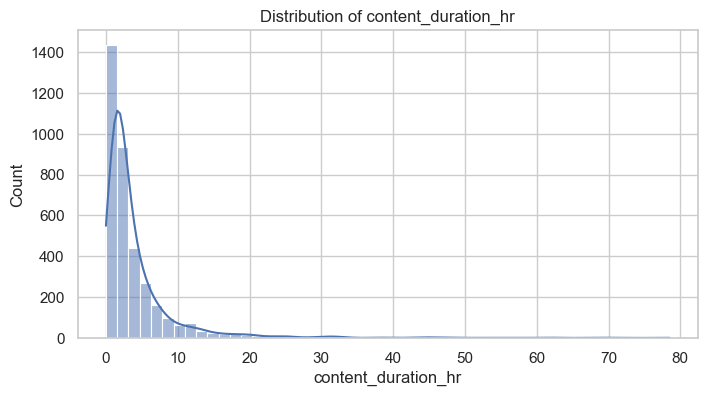

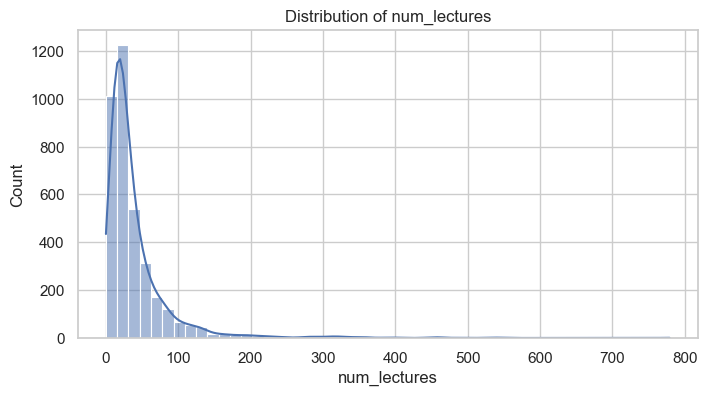

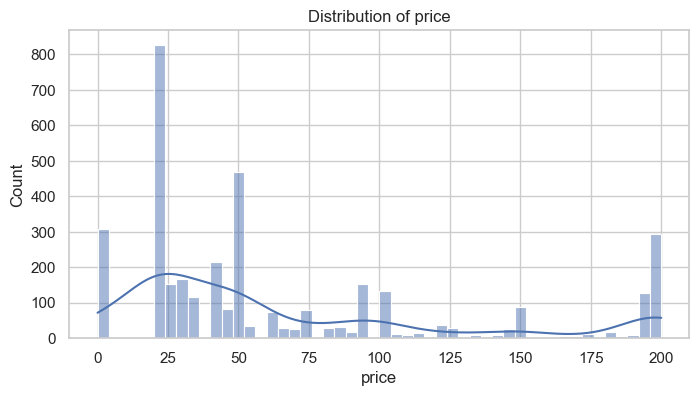

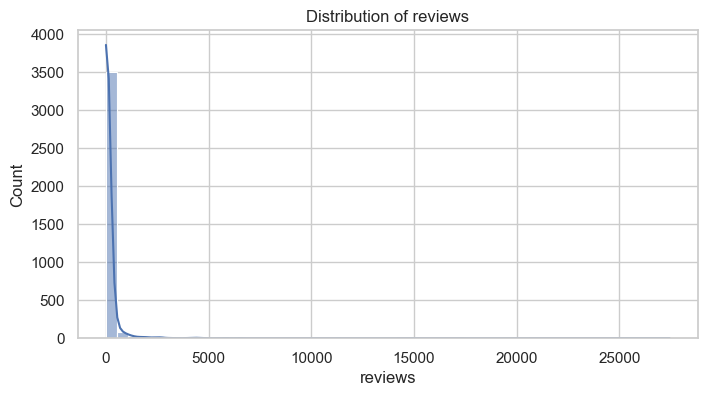

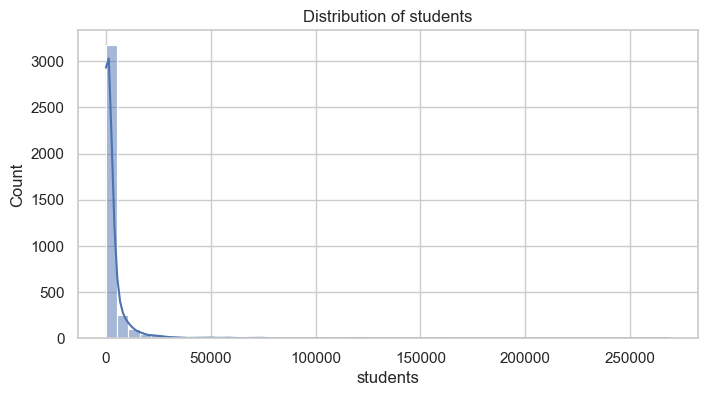

In [18]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(courses[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [19]:
# Numerical and categorical columns
num_cols = ['content_duration_hr', 'num_lectures', 'price', 'reviews', 'students']
cat_cols = ['is_paid', 'level', 'subject']

#  Univariate Analysis 

Summary statistics for 'content_duration_hr':
count    3667.000000
mean        4.119873
std         6.050489
min         0.000000
25%         1.130000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration_hr, dtype: float64 



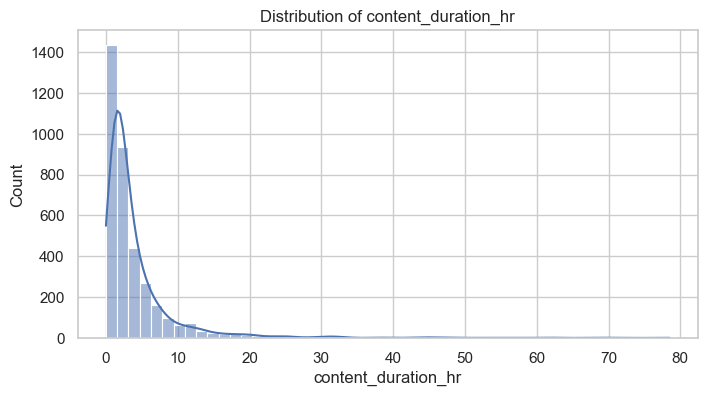

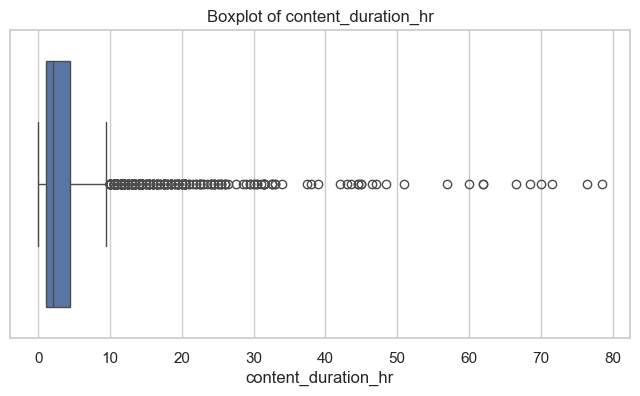

Summary statistics for 'num_lectures':
count    3667.000000
mean       40.136079
std        50.445168
min         0.000000
25%        15.000000
50%        25.000000
75%        46.000000
max       779.000000
Name: num_lectures, dtype: float64 



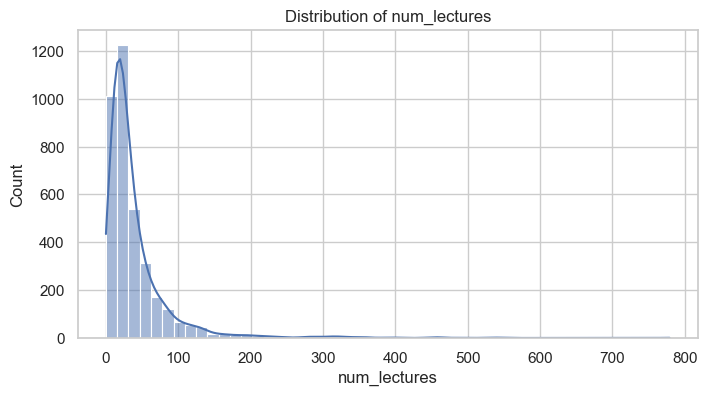

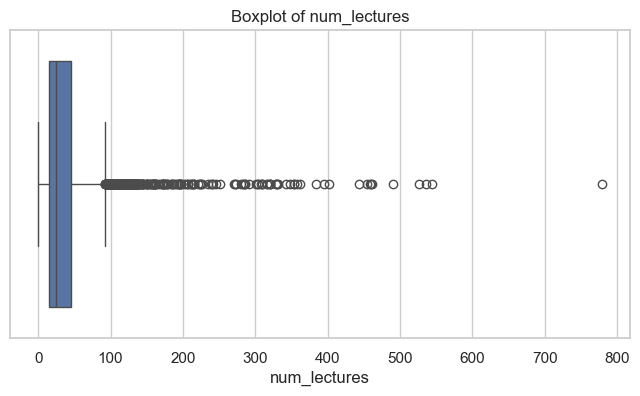

Summary statistics for 'price':
count    3667.000000
mean       66.103082
std        61.058165
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64 



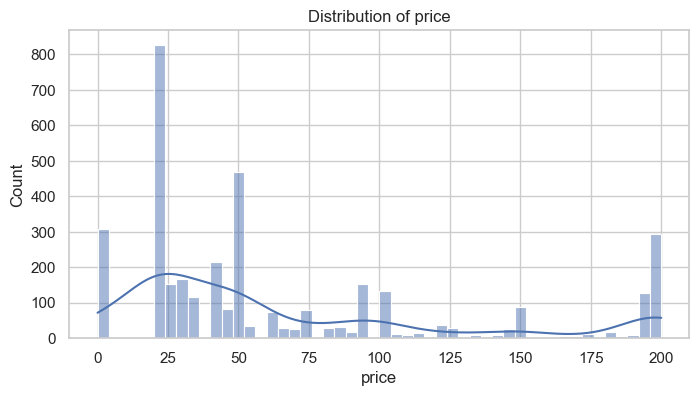

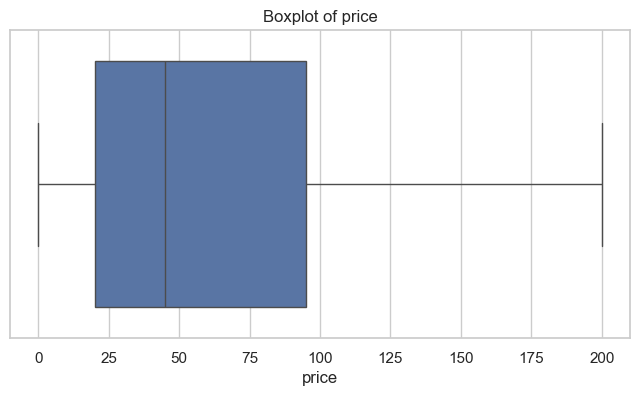

Summary statistics for 'reviews':
count     3667.000000
mean       156.551404
std        936.803791
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: reviews, dtype: float64 



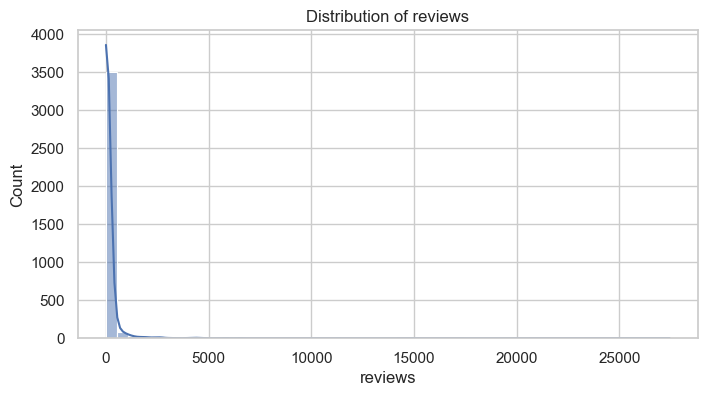

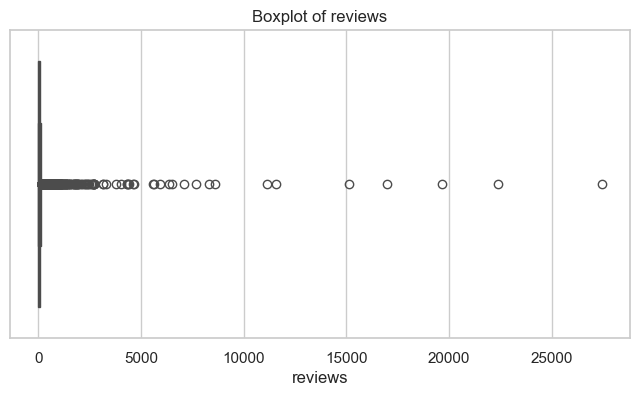

Summary statistics for 'students':
count      3667.000000
mean       3192.060813
std        9494.103073
min           0.000000
25%         111.000000
50%         912.000000
75%        2545.000000
max      268923.000000
Name: students, dtype: float64 



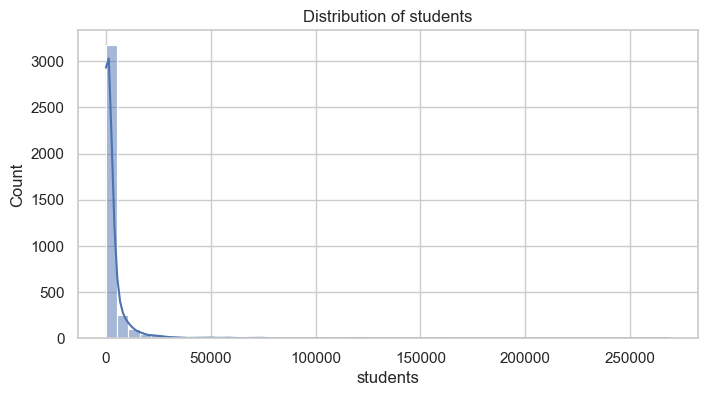

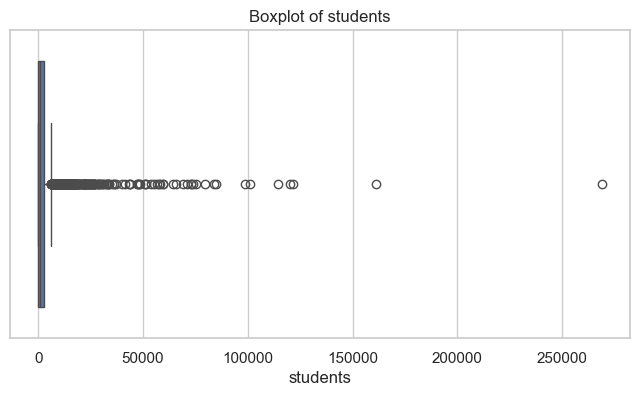

In [20]:
# Numerical columns - distribution & stats
for col in num_cols:
    print(f"Summary statistics for '{col}':")
    print(courses[col].describe(), "\n")
    
    plt.figure(figsize=(8, 4))
    sns.histplot(courses[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=courses[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Value counts for 'is_paid':
is_paid
Paid    3358
Free     309
Name: count, dtype: int64 



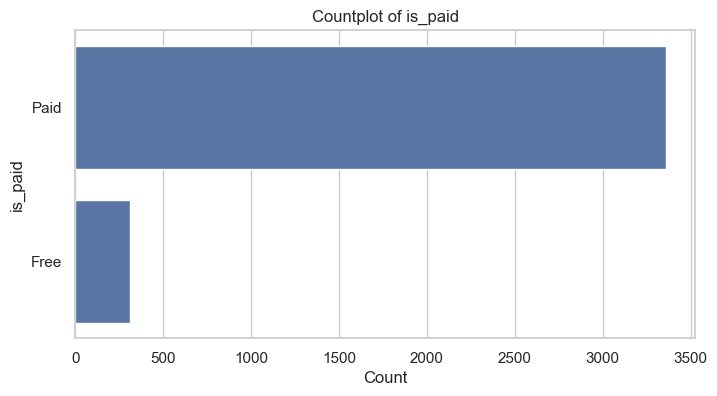

Value counts for 'level':
level
All Levels            1920
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64 



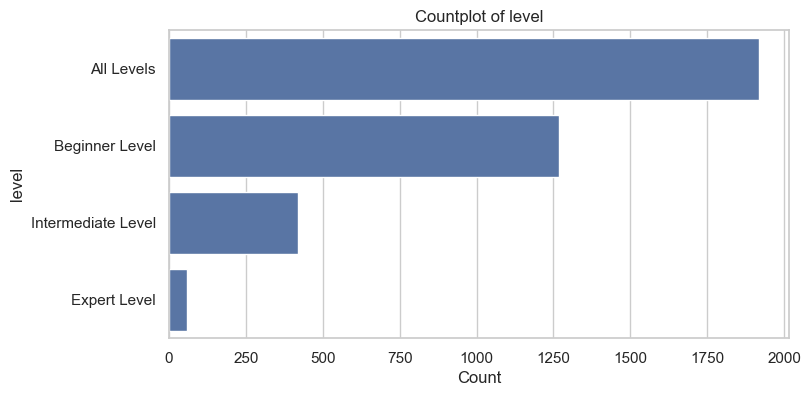

Value counts for 'subject':
subject
Web Development        1199
Business Finance       1190
Musical Instruments     676
Graphic Design          602
Name: count, dtype: int64 



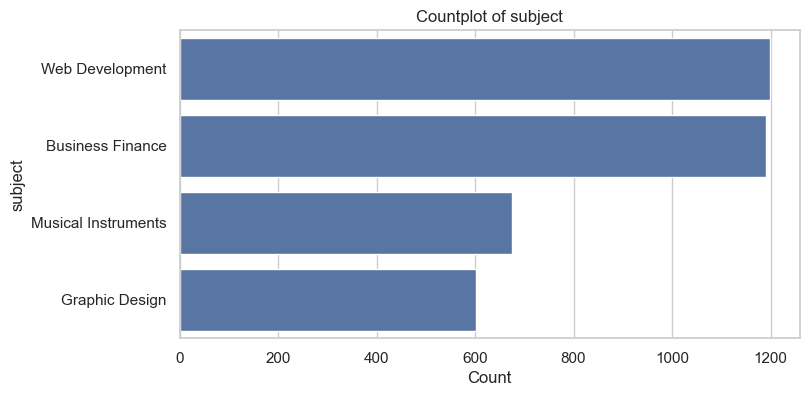

In [21]:
# Categorical columns - counts
for col in cat_cols:
    print(f"Value counts for '{col}':")
    print(courses[col].value_counts(), "\n")
    
    plt.figure(figsize=(8, 4))
    sns.countplot(y=courses[col], order=courses[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Bivariate Analysis 

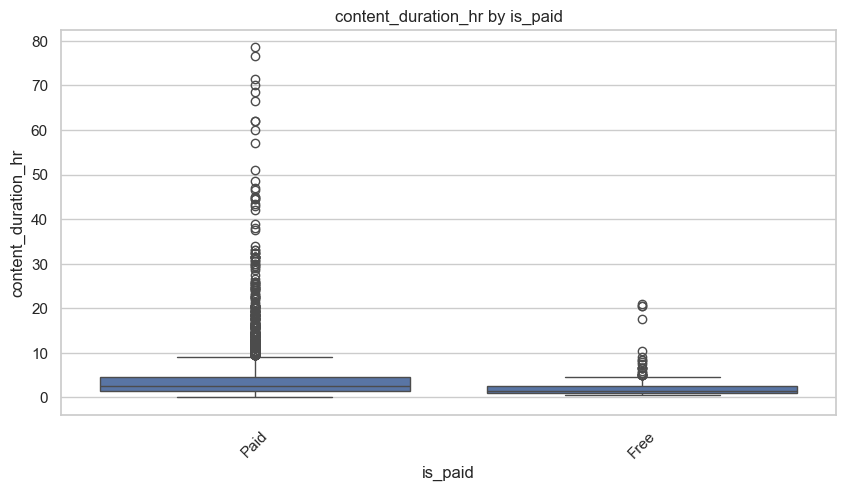

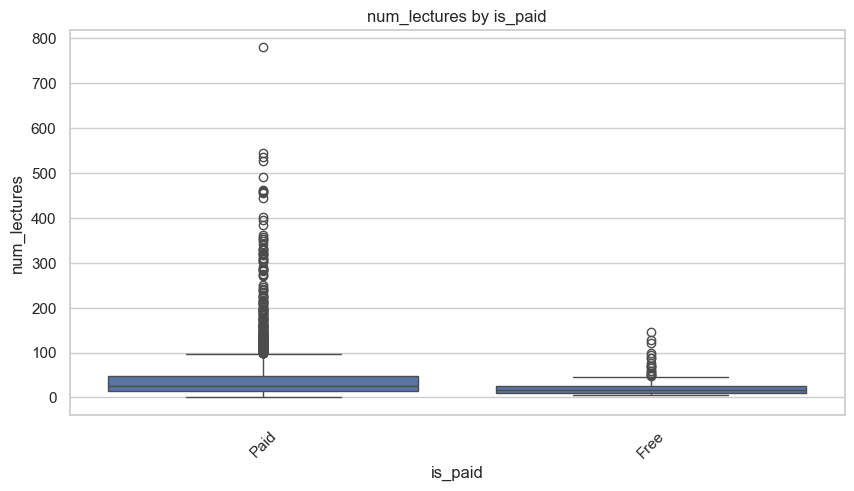

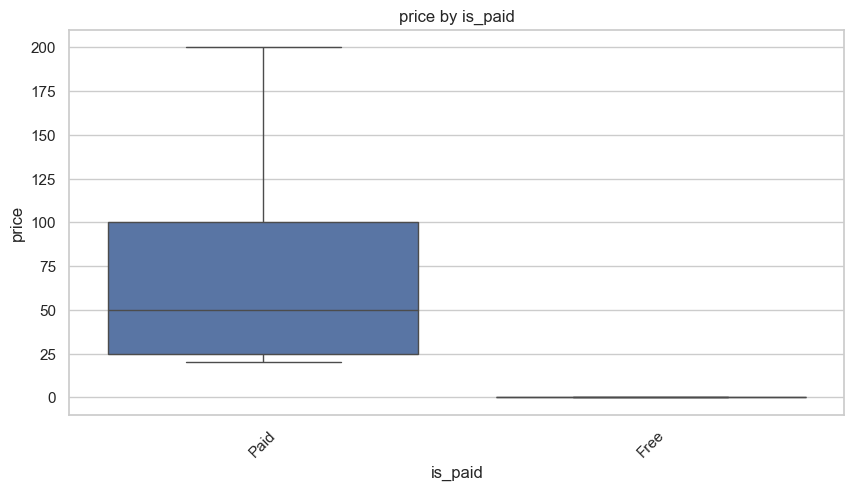

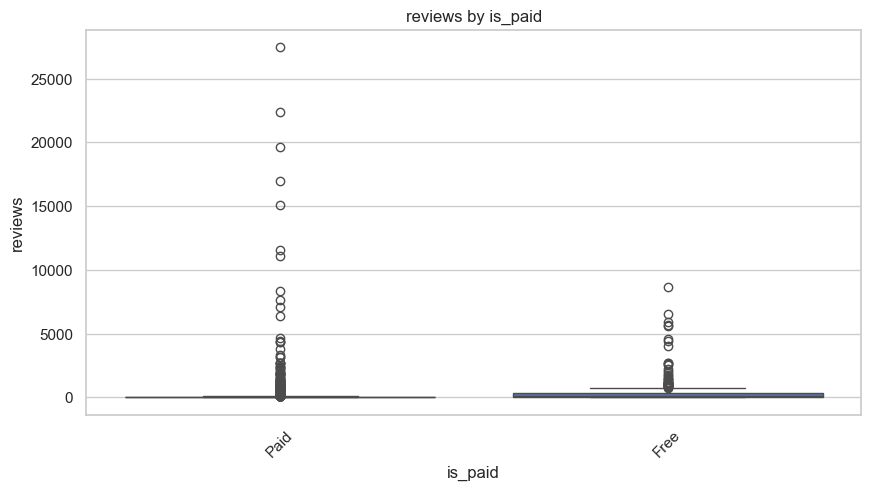

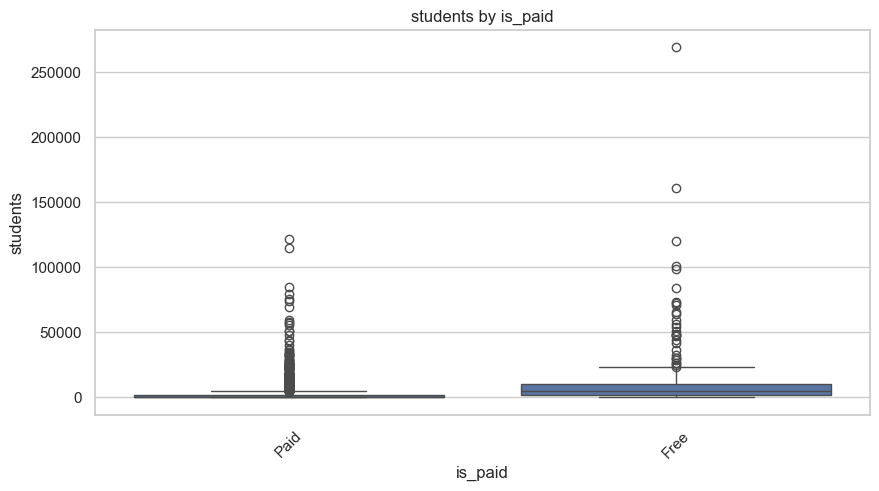

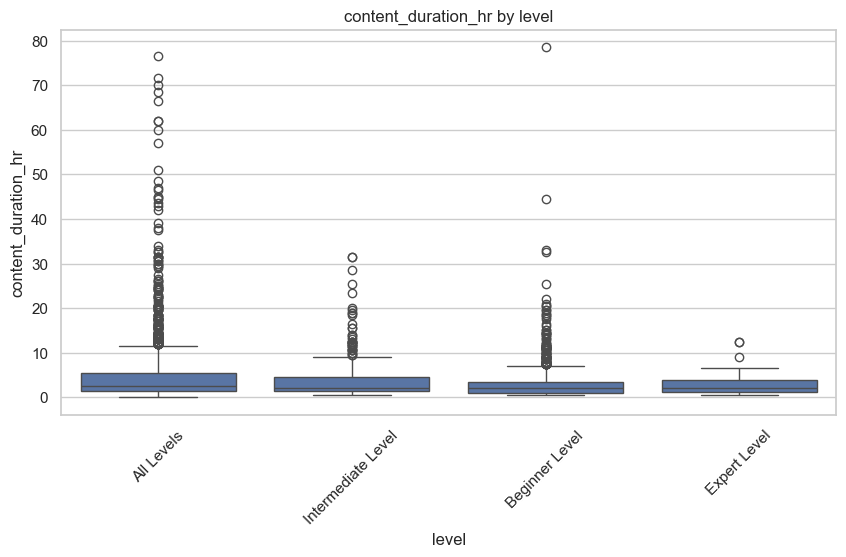

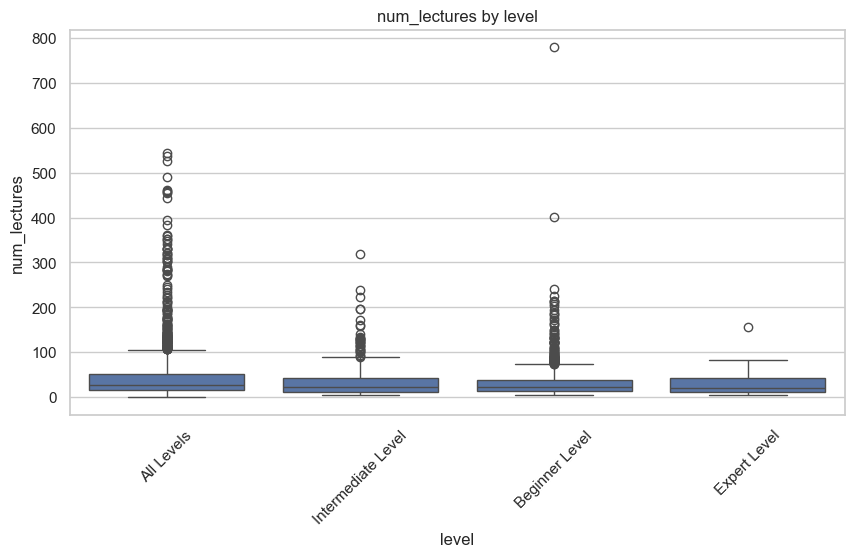

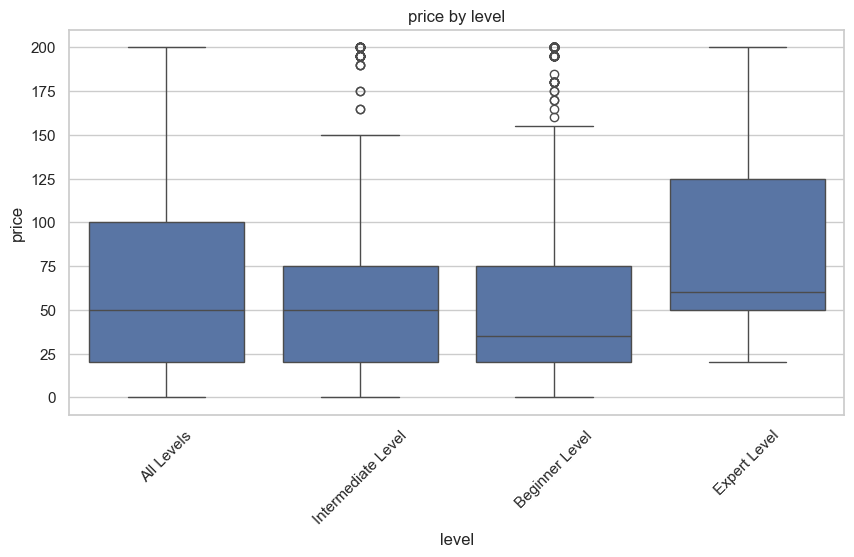

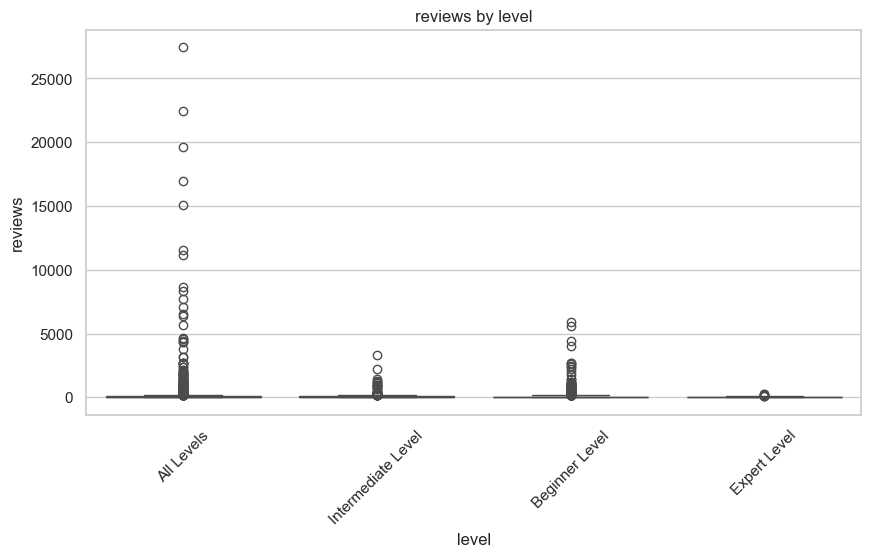

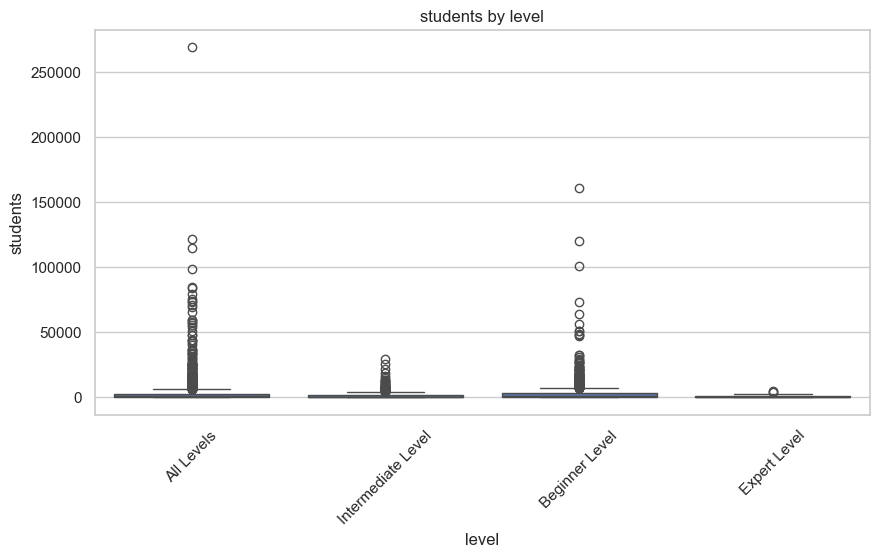

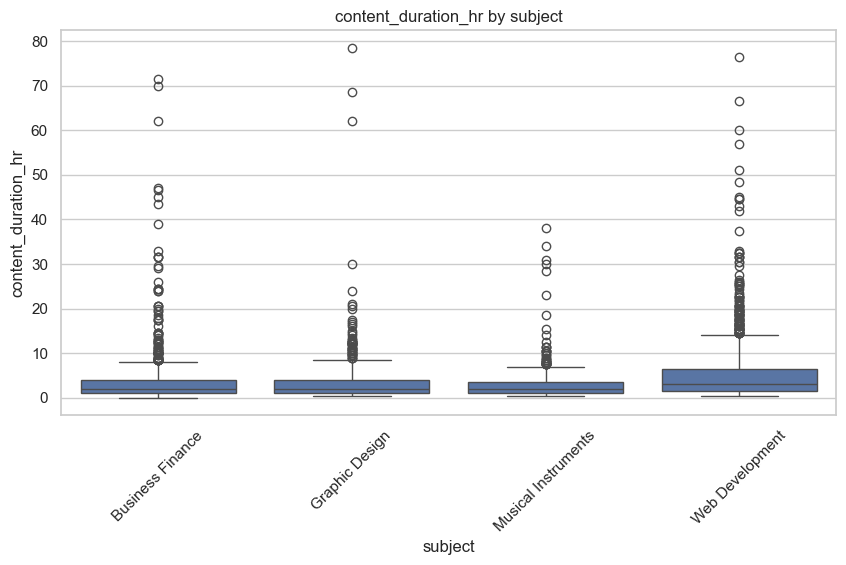

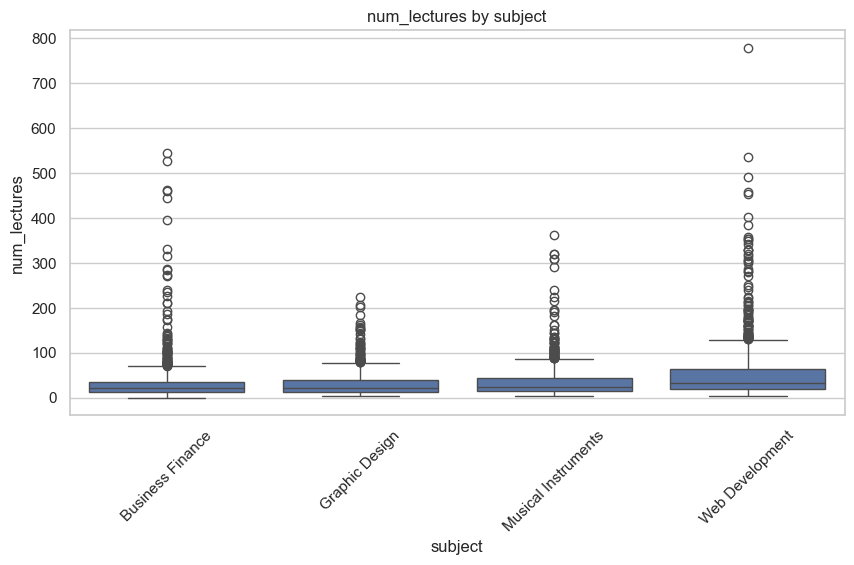

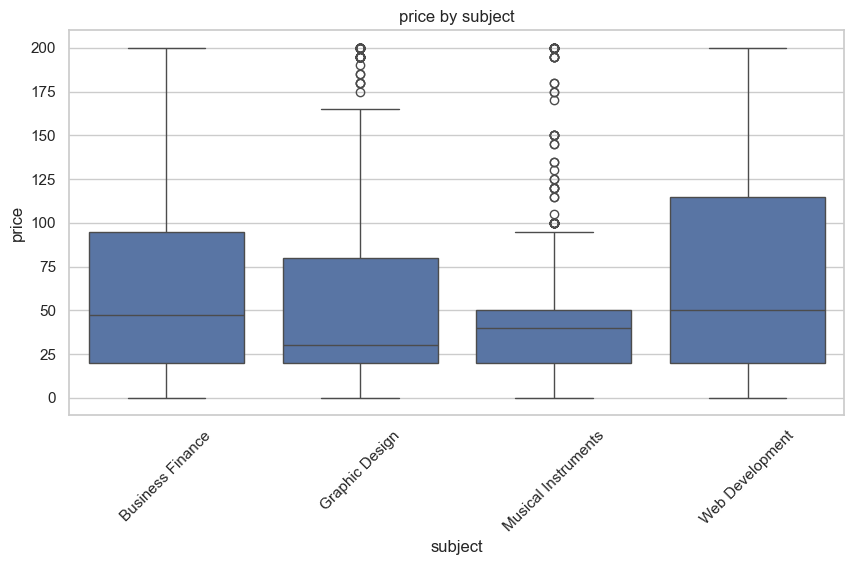

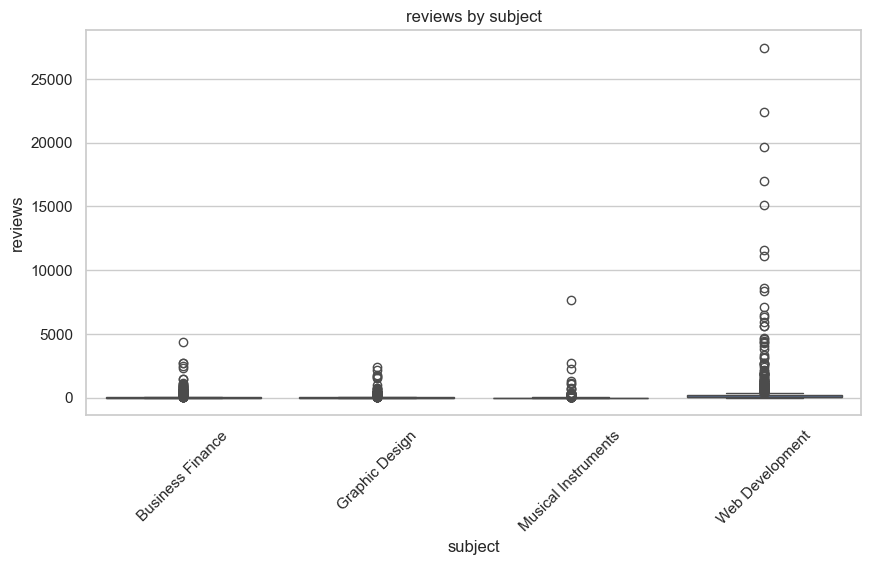

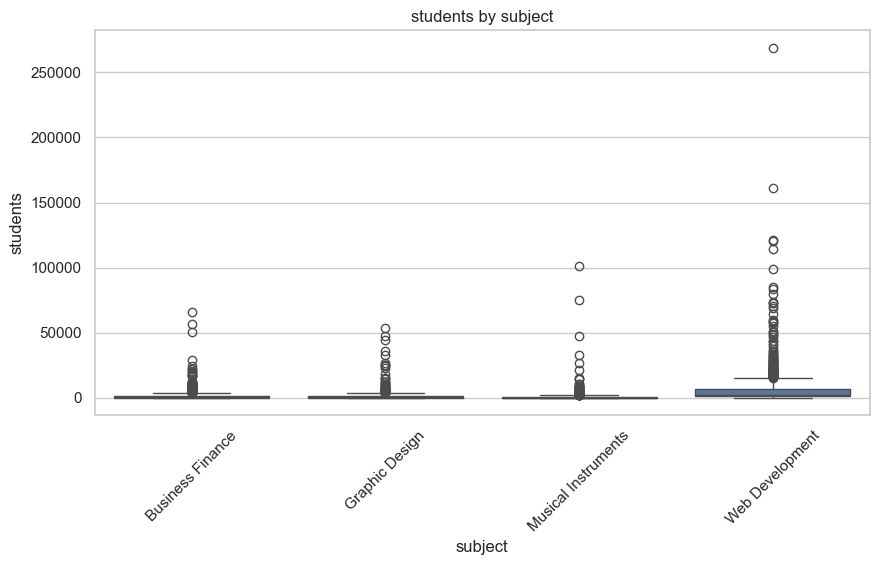

In [22]:
# Numerical vs Categorical (Boxplots)
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat, y=num, data=courses)
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.show()

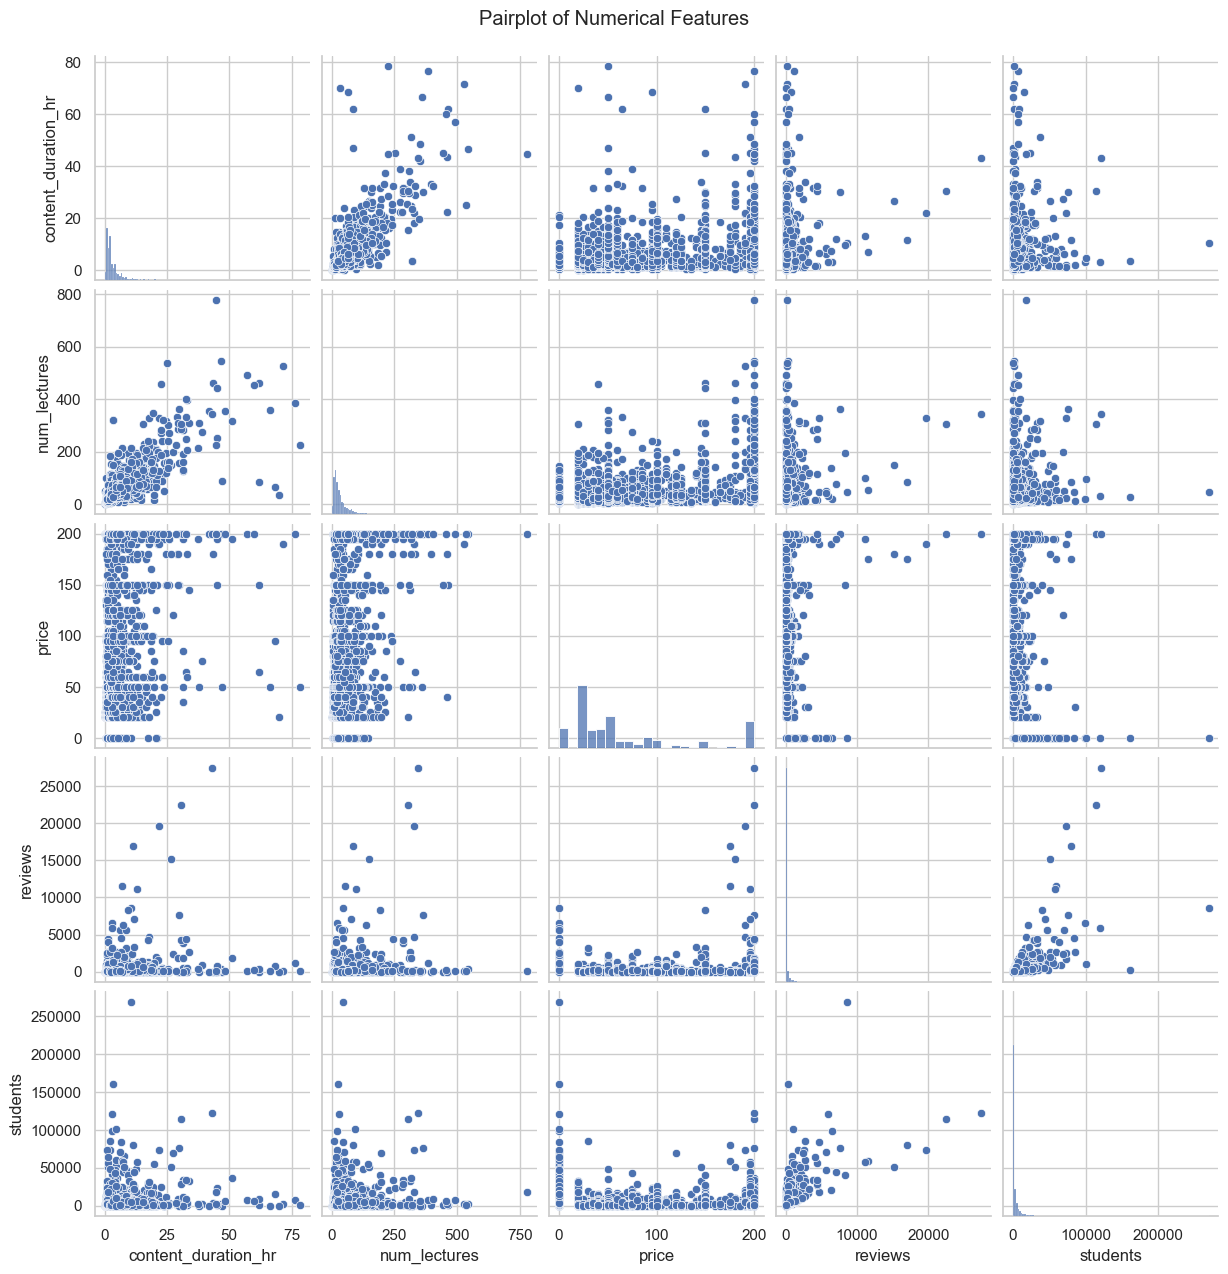

In [23]:
# Numerical vs Numerical (Scatterplots + Correlation)
sns.pairplot(courses[num_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

In [24]:
print("Correlation matrix:\n", courses[num_cols].corr(), "\n")

Correlation matrix:
                      content_duration_hr  num_lectures     price   reviews  \
content_duration_hr             1.000000      0.801212  0.291789  0.228863   
num_lectures                    0.801212      1.000000  0.329837  0.243054   
price                           0.291789      0.329837  1.000000  0.113594   
reviews                         0.228863      0.243054  0.113594  1.000000   
students                        0.161791      0.158329  0.050440  0.651083   

                     students  
content_duration_hr  0.161791  
num_lectures         0.158329  
price                0.050440  
reviews              0.651083  
students             1.000000   



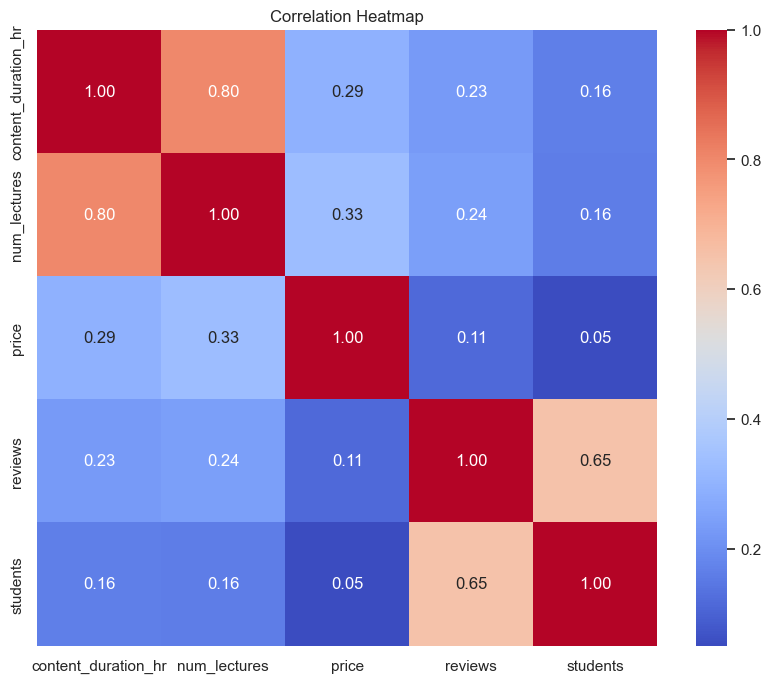

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(courses[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Crosstab between 'is_paid' and 'level':
level    All Levels  Beginner Level  Expert Level  Intermediate Level
is_paid                                                              
Free            121             158             0                  30
Paid           1799            1110            58                 391



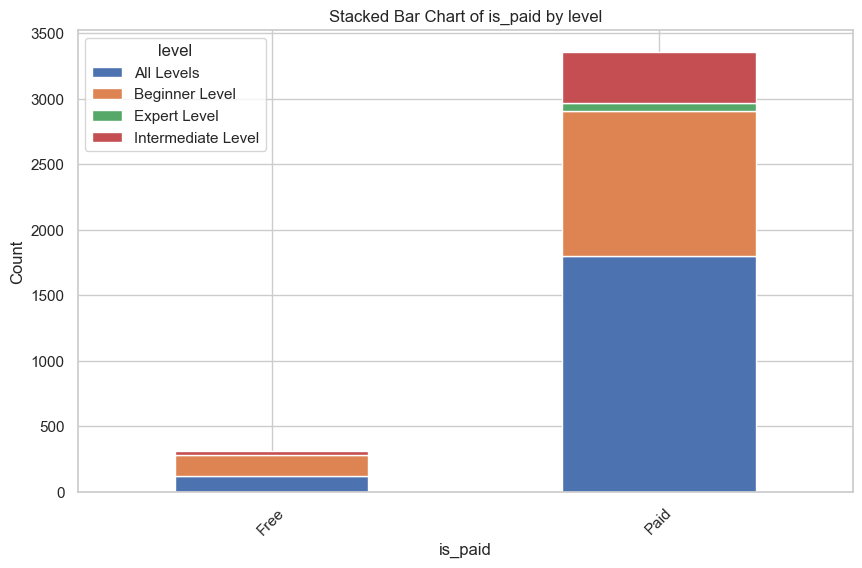

Crosstab between 'is_paid' and 'subject':
subject  Business Finance  Graphic Design  Musical Instruments  \
is_paid                                                          
Free                   95              35                   46   
Paid                 1095             567                  630   

subject  Web Development  
is_paid                   
Free                 133  
Paid                1066  



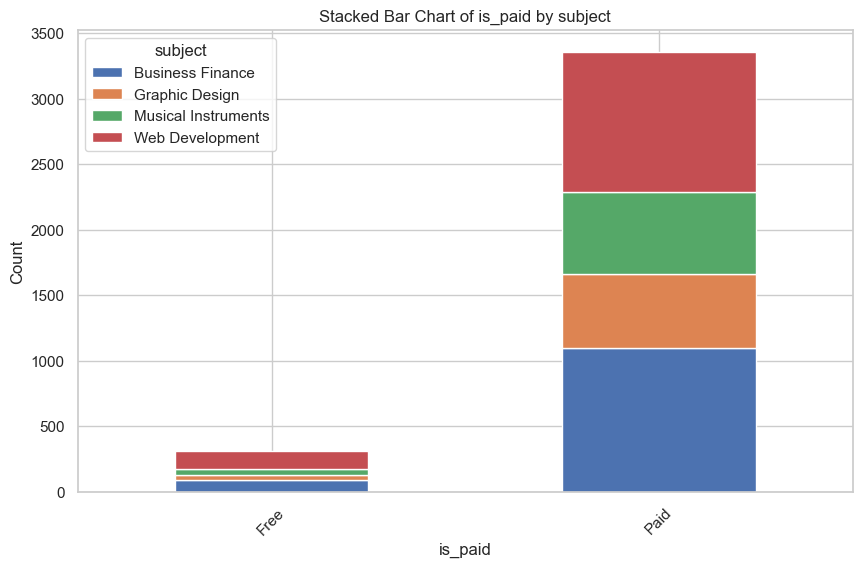

Crosstab between 'level' and 'subject':
subject             Business Finance  Graphic Design  Musical Instruments  \
level                                                                       
All Levels                       692             298                  272   
Beginner Level                   339             242                  296   
Expert Level                      31               5                    7   
Intermediate Level               128              57                  101   

subject             Web Development  
level                                
All Levels                      658  
Beginner Level                  391  
Expert Level                     15  
Intermediate Level              135  



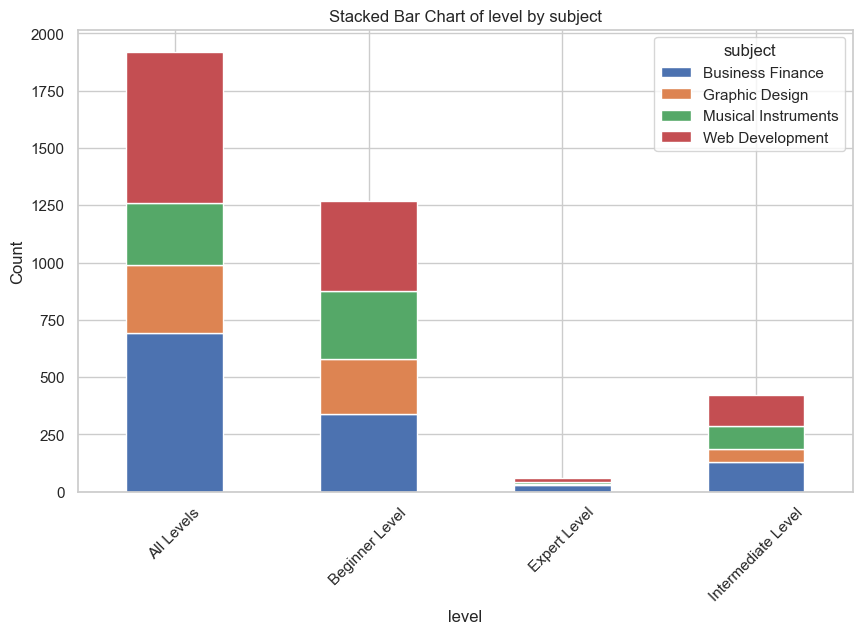

In [26]:
# Categorical vs Categorical (Crosstabs and stacked bar)
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        ct = pd.crosstab(courses[cat_cols[i]], courses[cat_cols[j]])
        print(f"Crosstab between '{cat_cols[i]}' and '{cat_cols[j]}':\n{ct}\n")
        
        ct.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Stacked Bar Chart of {cat_cols[i]} by {cat_cols[j]}')
        plt.xlabel(cat_cols[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [27]:
courses.to_csv('../assets/data/courses.csv', index=False)